<a href="https://colab.research.google.com/github/OlivlfilipeOliveira/operacoes-morforlogicas/blob/main/Opera%C3%A7%C3%B5es_morfol%C3%B3gicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho para a disciplina Processamento Digital de Imagens**

**Nome:** Filipe da Silva Oliveira

**Professora:** Tácito Neves

**Curso:** Ciência da Computação

**Disciplina:** Processamento Digital de Imagens

**Período:** 2020.2


**Atividade:** Os alunos deverão implementar um código que permita a escolha de um elemento estruturante e receba uma imagem de entrada. A saída do
algoritmo será o resultado da aplicação do elemento estruturante para
as operações de morfologia: **dilatação**, **erosão**, **abertura** e **fechamento**.

 

*   A ideia central do trabalho é conseguir aplicar as operações morfológicas a partir de uma imagem inserida com um elemento estruturante. Sendo assim, ao longo deste Notebook será possível observar a implementação e aplicação das 4 operações (dilatação, erosão, abertura e fechamento) bem como a ação de binarização e geração de contorno da imagem.
*   **Implementação dos requisitos mínimos:** Primeiramente é lido a imagem do Google Drive, já em tom de cinza. Após a leitura da imagem é realizado a implementação e aplicação da binarização e geração de contornos. Seguindo tem-se, a implementação das operações morfológicas em um bloco de código com 4 funções.
* **Para executar o código** basta abrir o colab normalmente, executr bloco por bloco ou completo (ctrl+f9). Caso não consiga montar o drive para encontrar a imagem ela pode ser encontrada no seguinte link: https://drive.google.com/file/d/1-F6Z46vfv7RNQC4w74-D_d21pBeJ1Nyg/view?usp=sharing 



# **Importação de bibliotecas**

In [20]:
import numpy as np #importando numpy
import cv2 #importando openCV
from google.colab.patches import cv2_imshow #importando pacote para mostrar imagens
from skimage.measure import find_contours #inportando função que auxilia no encontro de contornos das imagens

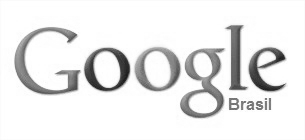

In [21]:
#lendo imagem já com tom de cinza
original = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/UFAL/ImagensPDI/google.jpg'), cv2.COLOR_RGBA2GRAY)
cv2_imshow(original)



# **Implementando funções para binarização e obtenção de contorno da imagem**


In [22]:
#Função de binarização da imagem
def binarize(image):
    t = 120
    image_bin = image.copy() 
    
    image_bin[image_bin > t] = 255
    image_bin[image_bin <= t] = 0
     
    return image_bin

#Função de gerar contornos na imagem
def genarateImageContour(image):
  contourImg = np.zeros(image.shape + (3, ), np.uint8)

  contours = find_contours(image, 0)

  for contour in contours:
    contour = contour.astype(np.int).tolist()

    #para gerar linhas de contorno
    for idx, coords in enumerate(contour[:-1]):
      y1, x1, y2, x2 = coords + contour[idx+1]
      contourImg = cv2.line(contourImg, (x1, y1), (x2, y2), (0, 255, 0), 1)
  
  contourImg = contourImg[:,:,1]

  return contourImg

# **Gerando variantes da imagem (contornada e binarizada)**

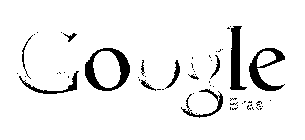

In [23]:
#Aplicando binarização
imageBinary = binarize(original)

cv2_imshow(imageBinary)

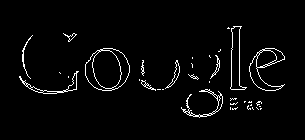

In [24]:
#Gerando contornos
imageContourn = genarateImageContour(imageBinary)
cv2_imshow(imageContourn)


# **Escolhendo elemento estruturante**

In [25]:
#Escolhendo elemento estruturante a partir da biblioteca opencv
structure_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
structure_element

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

# **Criando funções de operações morforlógicas**

In [26]:
#Implementação da função de dilação
def dilate(image, structure_element, contoursImg):
  imageDilate = image

  c = int(len(structure_element)/2)

  for i in range(len(imageDilate)):
    for j in range(len(imageDilate[0])):
      if (contoursImg[i,j]==255):
        
        for k in range(len(structure_element)):
          for x in range(len(structure_element[0])):
            if (structure_element[k, x] != 0):
              try:

                imageDilate[i+k-c, j+k-c] = 255
              except:
                pass
  return imageDilate

#Implementação da função de erosão
def erode(image, structure_element, contourImg):
  imageErode = image

  c = int(len(structure_element)/2)

  for i in range(len(imageErode)):
    for j in range(len(imageErode[0])):
      if (contourImg[i,j]==255):
        
        for k in range(len(structure_element)):
          for x in range(len(structure_element[0])):
            if (structure_element[k, x] != 0):
              try:

                imageErode[i+k-c, j+k-c] = 0
              except:
                pass
  return imageErode

#Implementação da função de abertura
def opening(image, structure_element, contourImg):
  imageCopy = np.copy(image)
  imageErode = erode(imageCopy, structure_element, contourImg)
  contourNew = genarateImageContour(imageErode)
  imageOpening = dilate(imageErode, structure_element, contourNew)

  return imageOpening;

#Implementação da função de fechamento
def closing(image, structure_element, contourImg):
  imageCopy = np.copy(image)
  imageDilate = dilate(imageCopy, structure_element, contourImg) 
  contourNew = genarateImageContour(imageDilate)
  imageClosing = erode(imageDilate, structure_element, contourNew)

  return imageClosing



# **Aplicando operações morfológicas**

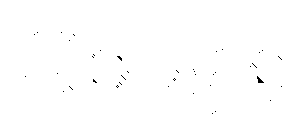

In [27]:
#Aplicação da função de dilatação
imageDilate = dilate(imageBinary, structure_element, imageContourn)
cv2_imshow(imageDilate)

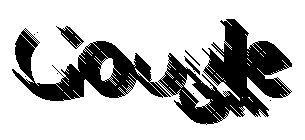

In [28]:
#Aplicação da função de erosão
imageErode = erode(imageBinary, structure_element, imageContourn)
cv2_imshow(imageErode)

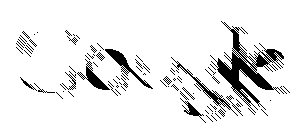

In [29]:
#Aplicação da função de abertura
imageOpening = opening(imageBinary, structure_element, imageContourn)
cv2_imshow(imageOpening)

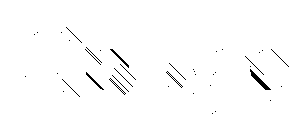

In [30]:
#Aplicação da função de fechamento
imageClosing = closing(imageBinary, structure_element, imageContourn)
cv2_imshow(imageClosing)

# Vídeo explicativo do trabalho:

Link: [Vídeo Explicativo ](https://youtu.be/phvrG7TJUFo)